# Calculating the Hubble constant using least-square fitting 

In this exercise we calculate unweighted and weighted linear least-squares fits using three different methods. <br> We will be using astronomical data to calculate the Hubble constant.

#### First method: 
Calculating everything step by step without the use of any complex functions.

#### Second method: 
Using the numpy polyfit() function to fit to an order-1 polynomial.

#### Third method: 
Using the scipy curve fit() function to fit to the function y = mx + c.

## Hubble's law

Hubble's law is the following:
$$ v = H_0 D $$ 
Where v is the radial velocity (positive for recessing bodies), and D is the distance of the body from the earth. <br> Measuring distances in cosmology can result in large uncertainties, that is why the third column of data is included.

(Dr Louise Dash 2019)

## About the data

We will be using astronomical data, prepared by Dr Pablo Lemos (Demonstrator in the Tuesday morning team, and Postdoctoral Researcher in the UCL Astrophysics group), from observations of type Ia Supernovae to calculate a value for the Hubble constant. <br> The data comes from the Joint Light Curve Analysis (JLA) of the SDSS-II and SNLS supernova samples Betoule et al (2014). <br> 
The first column of the data will be velocities (in km/s), the second column of the data will be distances (in Mpc) and the third colomn of the data will be the uncertainties of the distances (in Mpc). <br>
1pc ≈ 3.0857 × 1016m

(Dr Louise Dash 2019)

# Python code

## Question 1 - Unweighted and weighted linear least-squares fit from first principles

### a) Loading the data and plotting it on a graph

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
# load data from hubble_data excel file
# [velocityX] = km/s
# [distanceY] = Mpc
# [error_distanceY] = Mpc
velocityX, distanceY, err_distanceY = np.loadtxt("hubble_data.csv", delimiter=',', skiprows=1, unpack=True)

### b) Plotting the data, using y-errorbars

<IPython.core.display.Javascript object>


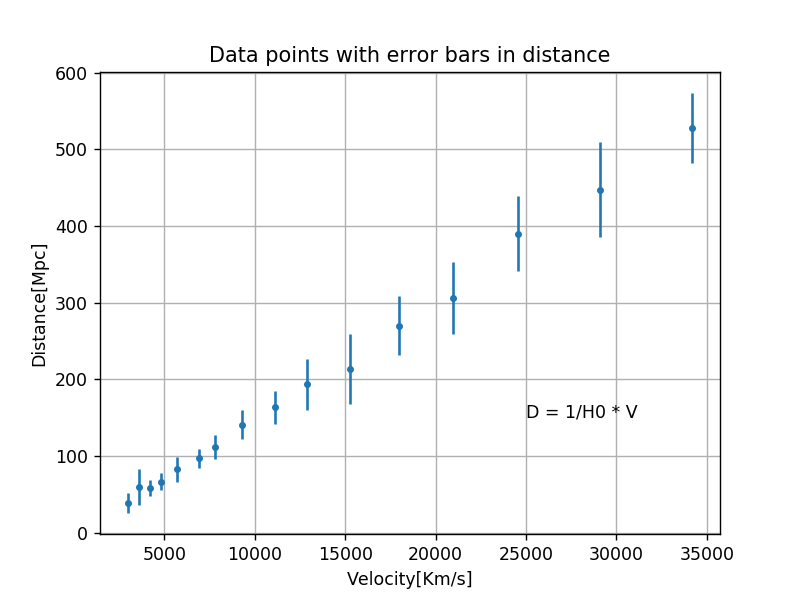

In [3]:
# start a new figure
plt.figure()
# add title
plt.title("Data points with error bars in distance")
# add grid lines
plt.grid(True)
# label the x and y axes
plt.xlabel("Velocity[Km/s]")
plt.ylabel("Distance[Mpc]")

# plot the data
plt.errorbar(velocityX, distanceY, yerr=err_distanceY, fmt='.')

plt.text(25000,150,"D = 1/H0 * V")
plt.show()

### c) Calculating unweighted fit to the data


In [4]:
###The code in this section is implemented from the Session 5 Notebook

# basic information from the data using numpy functions
mean_X = np.mean(velocityX)
min_X = np.min(velocityX)
max_X = np.max(velocityX)
mean_Y = np.mean(distanceY)
min_Y = np.min(distanceY)
max_Y = np.max(distanceY)
n = velocityX.size

# calculating the slope of the line and the intercept of the line with the y axis
slope1 = np.sum((distanceY - mean_Y)*velocityX) / np.sum((velocityX - mean_X)*velocityX)
intercept1 = mean_Y - slope1*mean_X

In [5]:
###The code in this section is implemented from the Session 5 Notebook

# calculating the uncertainty of the slope and the intercept

# calculating S and D
S = np.sum((distanceY-slope1*velocityX-intercept1)**2)
D = np.sum((velocityX-mean_X)**2)

#uncertainty of the slope
unc_slope1 = np.sqrt(S/((n-2)*D))
# uncertainty of the intercept
unc_intercept1 = np.sqrt(((1/n)+(mean_X**2/D))* S/(n-2))

print("The slope is: ({0} \xb1 {1}) Mpc*s/km".format(slope1, unc_slope1))
print("The intercept is: ({0} \xb1 {1}) Mpc".format(intercept1, unc_intercept1))

The slope is: (0.015581875025882406 ± 0.0002078176855382908) Mpc*s/km
The intercept is: (-7.665453841663492 ± 3.36485821138723) Mpc


### d) Calculating weighted fit to the data

Calculating the weights for each data point where $\ \Delta y_i $ is the uncertainty for the point in the Y axis.<br>
 $$(1) \quad  w_i = \frac{1}{(\Delta y_i)^2} $$
We introduce $\ \delta $ to simplify the equations.
$$ (2) \quad \delta = \sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2 $$

The slope is calculated the following way: 
$$ (3) \quad m = \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2}\\
= \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\delta} $$
    
The intercpet is calculated like this:
$$ (4) \quad c = \frac{\sum_i w_i x_i^2 \sum_i w_i y_i - \sum_i w_i x_i \sum_i w_i x_i y_i}{\delta} $$
These equations are implemented from PHAS0007 Reading Week assignment: Supplementary notebook by Louis Dash

In [6]:
# Calculating weights for the weighted fit with given errors (1)
weights = 1/(err_distanceY**2)

# first calculating the denominator (2)
denominator = np.sum(weights)*np.sum(weights*velocityX**2)-(np.sum(weights*velocityX)**2)

# Calculating slope with weights (3)
weighted_slope1 = ((np.sum(weights)*np.sum(weights*velocityX*distanceY))-(np.sum(weights*velocityX)*np.sum(weights*distanceY)))/denominator

# Calculating intercept with weights (4)
weighted_intercept1 = (np.sum(weights*velocityX**2)*np.sum(weights*distanceY)-np.sum(weights*velocityX)*np.sum(weights*distanceY*velocityX))/denominator

This is how we calculate the uncertainty of the slope and the intercept:
 
$$ (4) \quad \Delta m = \sqrt{ \frac{\sum_i w_i}{\delta}} $$


$$ (5) \quad \Delta c = \sqrt{ \frac{\sum_i x_i^2 w_i}{\delta}} $$

These equations are implemented from PHAS0007 Reading Week assignment: Supplementary notebook by Louis Dash

In [7]:
#CALCULATING THE UNCERTAINTY FOR THE INTERCEPT AND THE SLOPE

# Calculating the weighted unceratinty of the slope (4)
weighted_unc_slope1 = np.sqrt(np.sum(weights)/denominator)

# Calculating the weighted unceratinty of the intercept (5)
weighted_unc_intercept1 = np.sqrt(np.sum(weights*velocityX**2)/denominator)

print("The slope is: ({0} \xb1 {1}) Mpc*s/km".format(weighted_slope1, weighted_unc_slope1))
print("The intercept is: ({0} \xb1 {1}) Mpc".format(weighted_intercept1, weighted_unc_intercept1))

The slope is: (0.015502698613504395 ± 0.0009401002347956379) Mpc*s/km
The intercept is: (-6.881414116663961 ± 7.858500366636018) Mpc


## Question 2 - Unweighted and weighted linear least-squares fit using the numpy polyfit( ) function

### a) unweighted least-squares fit of data

In [8]:
### This code is from LINEAR REGRESSION IN PYTHON by 
### Dr. I. Llorente-Garcia, UCL Dept. of Physics and Astronomy.

# The (x,y) data to fit:
x = velocityX
y = distanceY
# Vertical error bars (y error bars):
errory = err_distanceY

# A. Perform a linear fit without weighting:
# Fit to a line ax+b.
# We will obtain the uncertainties of slope and intercept from the covariance matrix.
# Degree of polynomial we want to fit, use 1 for a line:
degree = 1 
fit, cvm = np.polyfit(x,y,degree,cov='scaled') # fit function.
# Note regarding cov: If given and not False, return not just the estimate but also 
# its covariance matrix. By default, the covariance are scaled by chi2/sqrt(N-dof), i.e., 
# the weights are presumed to be unreliable except in a relative sense and everything is 
# scaled such that the reduced chi2 is unity. This scaling is omitted if cov='unscaled', 
# as is relevant for the case that the weights are 1/sigma**2, with sigma known to be a 
# reliable estimate of the uncertainty.
# 
# (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html).
# Outputs of np.polyfit are fit parameters (fit) and covariance matrix (cvm)
# The slope is the first element of fit: a = fit[0].
# The intercept is the second element of fit: b = fit[1].
# To obtain the uncertainties of fit parameters we get the diagonal elements
# of the covariance matrix:
dfit = [np.sqrt(cvm[i,i]) for i in range(2)] 
# The error of the slope is dfit[0].
# The error of the intercept is dfit[1].

slope2=fit[0]
unc_slope2=dfit[0]
intercept2=fit[1]
unc_intercept2=dfit[1]
# Print fit parameters with their errors (to 2 decimal places):
print("The slope is: ({0} \xb1 {1}) Mpc*s/km".format(slope2, unc_slope2))
print("The intercept is: ({0} \xb1 {1}) Mpc".format(intercept2, unc_intercept2))

The slope is: (0.0155818750258824 ± 0.0002078176855382906) Mpc*s/km
The intercept is: (-7.665453841663435 ± 3.3648582113872263) Mpc


### a) weighted least-squares fit of data

In [9]:
### This code is from LINEAR REGRESSION IN PYTHON by 
### Dr. I. Llorente-Garcia, UCL Dept. of Physics and Astronomy.

# Perform a weighted linear fit to a line ax+b:

# First calculate the weights for the y coordinate. 
# Enter weights as an array of 1/sigma for Gaussian uncertainties (not 1/sigma**2):
yWeights = 1/err_distanceY
# Perform weighted fit:
fit2, cvm2 = np.polyfit(x,y,degree,w=yWeights,cov='unscaled')
# Outputs and errors of fitted parameters are same as before.
dfit2 = [np.sqrt(cvm2[i,i]) for i in range(2)]

weighted_slope2 = fit2[0]
weighted_unc_slope2 = dfit2[0]
weighted_intercept2 = fit2[1]
weighted_unc_intercept2 = dfit2[1]

print("The slope is: ({0} \xb1 {1}) Mpc*s/km".format(weighted_slope2, weighted_unc_slope2))
print("The intercept is: ({0} \xb1 {1}) Mpc".format(weighted_intercept2, weighted_unc_intercept2))

The slope is: (0.015502698613504408 ± 0.0009401002347956373) Mpc*s/km
The intercept is: (-6.881414116663822 ± 7.8585003666360125) Mpc


## Question 3 - Unweighted and weighted linear least-squares fit using the scipy curve_fit( ) function

#### Explanation: 
The curve_fit() function first takes in a model function that must take the independent variable as the first argument and the parameters to fit as separate remaining arguments. After that it takes in the x and y coordinates of the points we want to fit our function at.<br>
The output of the cure_fit() function are an array and a 2d array.<br>
The array has the optimal parameters so that the sum of the squared residuals is minimized.<br>
From the 2D array we can calculate the uncertainties with the following formula: perr = np.sqrt(np.diag(pcov)).

Reference:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

### a) unweighted and weighted fits of the data

In [10]:
### This code is from Use scipy's curve_fit function to fit the data by
### Louise Dash, October 2019

# we're importing just this one function from scipy.optimize
from scipy.optimize import curve_fit 


def straight_line(x,m,c):
    """Calculates a straight line y = mx+c
    Inputs: x value (or set of x values)
            gradient of straight line m
            y-intercept of straight line c
    Returns: the corresponding y value(s)"""
    y = m*x + c # equation for straight line
    return y

# Unweighted fit:
# poptUW: Optimized parameters for the unweighted fit
# pcovUW: matrix of covariance for the unweighted fit
#   xi, yi: rename these to whatever variable names you have used
#   for your x and y data respectively.  

poptUW,pcovUW = curve_fit(straight_line,velocityX,distanceY)


# Weighted fit
# poptW: Optimized parameters for the weighted fit
# pcovW: matrix of covariance for the weighted fit
#   xi, yi: rename these to whatever variable names you have used
#   for your x and y data respectively.  

poptW,pcovW = curve_fit(straight_line,velocityX,distanceY, sigma=err_distanceY, absolute_sigma=True)

perr1 = np.sqrt(np.diag(pcovUW))
perr2 = np.sqrt(np.diag(pcovW))

slope3 = poptUW[0]
unc_slope3 = perr1[0]
intercept3 = poptUW[1]
unc_intercept3 = perr1[1]

weighted_slope3 = poptW[0]
weighted_unc_slope3 = perr2[0]
weighted_intercept3 = poptW[1]
weighted_unc_intercept3 = perr2[1]

print("The slope is: ({0} \xb1 {1}) Mpc*s/km".format(slope3, unc_slope3))
print("The intercept is: ({0} \xb1 {1}) Mpc".format(intercept3, unc_intercept3))
print()
print("The weighted slope is: ({0} \xb1 {1}) Mpc*s/km".format(weighted_slope3, weighted_unc_slope3))
print("The weighted intercept is: ({0} \xb1 {1}) Mpc".format(weighted_intercept3, weighted_unc_intercept3))

The slope is: (0.015581874993853734 ± 0.00020781773315223012) Mpc*s/km
The intercept is: (-7.665453210233705 ± 3.364858743089755) Mpc

The weighted slope is: (0.015502698594656278 ± 0.0009401002203658244) Mpc*s/km
The weighted intercept is: (-6.881413924365953 ± 7.858500568411606) Mpc


### b) Explaining the covariance matrix
The covariance of two random variables tells us how one of them changes as the other changes. It tells us how if we increase x, y increases or decreases too. This is the information the covariance matrix contains.

Reference:<br>
https://www.youtube.com/watch?v=KDw3hC2YNFc
https://en.wikipedia.org/wiki/Covariance_matrix

## Question 4

### a) Outputting the three sets of results

In [11]:
print("1st Method - From first principles")
print()
print("Unweighted:")
print("Slope= ({0} \xb1 {1}) Mpc*s/km".format(slope1,unc_slope1))
print("Intercept= ({0} \xb1 {1}) Mpc".format(intercept1,unc_intercept1))
print("Weighted:")
print("Slope= ({0} \xb1 {1}) Mpc*s/km".format(weighted_slope1,weighted_unc_slope1))
print("Intercept= ({0} \xb1 {1}) Mpc".format(weighted_intercept1,weighted_unc_intercept1))
print()
print("2nd Method - Using the numpy polyfit( ) function")
print()
print("Unweighted:")
print("Slope= ({0} \xb1 {1}) Mpc*s/km".format(slope2,unc_slope2))
print("Intercept= ({0} \xb1 {1}) Mpc".format(intercept2,unc_intercept2))
print("Weighted:")
print("Slope= ({0} \xb1 {1}) Mpc*s/km".format(weighted_slope2,weighted_unc_slope2))
print("Intercept= ({0} \xb1 {1}) Mpc".format(weighted_intercept2,weighted_unc_intercept2))
print()
print("3rd Method - Using the scipy curve_fit( ) function")
print()
print("Unweighted:")
print("Slope= ({0} \xb1 {1}) Mpc*s/km".format(slope3,unc_slope3))
print("Intercept= ({0} \xb1 {1}) Mpc".format(intercept3,unc_intercept3))
print("Weighted:")
print("Slope= ({0} \xb1 {1}) Mpc*s/km".format(weighted_slope3,weighted_unc_slope3))
print("Intercept= ({0} \xb1 {1}) Mpc".format(weighted_intercept3,weighted_unc_intercept3))

1st Method - From first principles

Unweighted:
Slope= (0.015581875025882406 ± 0.0002078176855382908) Mpc*s/km
Intercept= (-7.665453841663492 ± 3.36485821138723) Mpc
Weighted:
Slope= (0.015502698613504395 ± 0.0009401002347956379) Mpc*s/km
Intercept= (-6.881414116663961 ± 7.858500366636018) Mpc

2nd Method - Using the numpy polyfit( ) function

Unweighted:
Slope= (0.0155818750258824 ± 0.0002078176855382906) Mpc*s/km
Intercept= (-7.665453841663435 ± 3.3648582113872263) Mpc
Weighted:
Slope= (0.015502698613504408 ± 0.0009401002347956373) Mpc*s/km
Intercept= (-6.881414116663822 ± 7.8585003666360125) Mpc

3rd Method - Using the scipy curve_fit( ) function

Unweighted:
Slope= (0.015581874993853734 ± 0.00020781773315223012) Mpc*s/km
Intercept= (-7.665453210233705 ± 3.364858743089755) Mpc
Weighted:
Slope= (0.015502698594656278 ± 0.0009401002203658244) Mpc*s/km
Intercept= (-6.881413924365953 ± 7.858500568411606) Mpc


### b) Choosen method
For general use my chosen method would be the second one because of it's simplicity. <br>
If the aim was to understand how weighted and unweighted lest-square fitting works I would choose the first method because implementing the equations to python already requires a general understanding of the methods.

### c) Plot with unweighted and weighted fitting lines

<IPython.core.display.Javascript object>


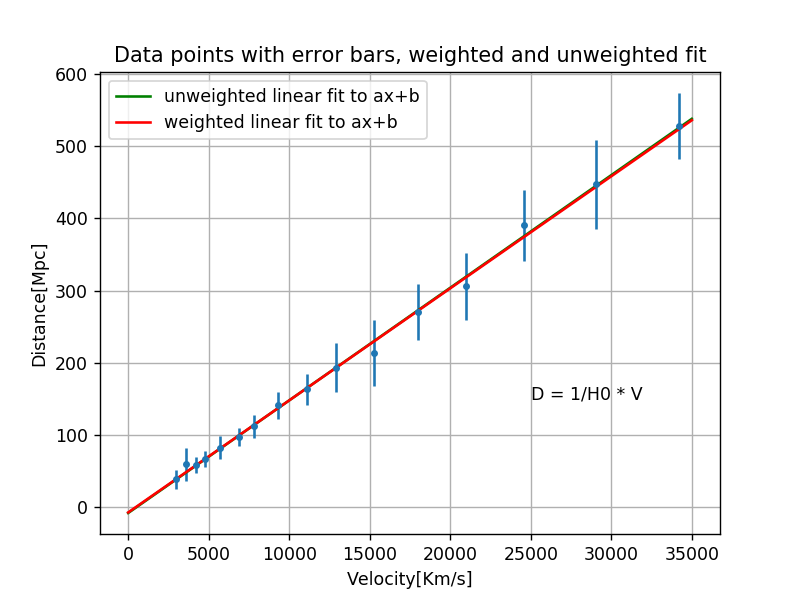

In [12]:
# Plot the data points together with the linear fit:

# start a new figure
plt.figure()
# add title
plt.title("Data points with error bars, weighted and unweighted fit")
# add grid lines
plt.grid(True)
# label the x and y axes
plt.xlabel("Velocity[Km/s]")
plt.ylabel("Distance[Mpc]")

#create array to plot fitted line
xline = np.array([0, 35000]) 

# Calculate the y coordinates of the points for both weighted and unweighted 
# Unweighted
yline = slope1*xline + intercept1
# Weighted
w_yline = weighted_slope1*xline + weighted_intercept1 #calculate fitted line for every xfit point

# plot the data
plt.errorbar(velocityX, distanceY, yerr=err_distanceY, fmt='.')

#plt.plot(x, y, 'ro', label="data")
plt.plot(xline, yline,'g', label="unweighted linear fit to ax+b")
plt.plot(xline, w_yline,'r', label="weighted linear fit to ax+b")

plt.text(25000,150,"D = 1/H0 * V")
plt.legend(loc="best")
plt.show()



### d) Final results with appropriate precision
In the case of the intercept the error's order of magnitude is the same as the value, because the data given had a fairly high precision going for more than 1sf seems right.

In [13]:
print("Final results:")
print()
print("Unweighted:")
print("Slope= ({0:0.4f} \xb1 {1:0.4f}) Mpc*s/km".format(slope1,unc_slope1))
print("Intercept= ({0:0.1f} \xb1 {1:0.1f}) Mpc".format(intercept1,unc_intercept1))
print("Weighted:")
print("Slope= ({0:0.4f} \xb1 {1:0.4f}) Mpc*s/km".format(weighted_slope1,weighted_unc_slope1))
print("Intercept= ({0:0.1f} \xb1 {1:0.1f}) Mpc".format(weighted_intercept1,weighted_unc_intercept1))

Final results:

Unweighted:
Slope= (0.0156 ± 0.0002) Mpc*s/km
Intercept= (-7.7 ± 3.4) Mpc
Weighted:
Slope= (0.0155 ± 0.0009) Mpc*s/km
Intercept= (-6.9 ± 7.9) Mpc


### e) Calculating and plotting the residual at each data point.
We calculate the residual for each point this way:
$$ d_i = y_i - mx_i- c$$
d is the residual.<br>
xi and yi are the coordinates of a point. <br>
m and c are the slope and intercept of the fitted line.

<IPython.core.display.Javascript object>


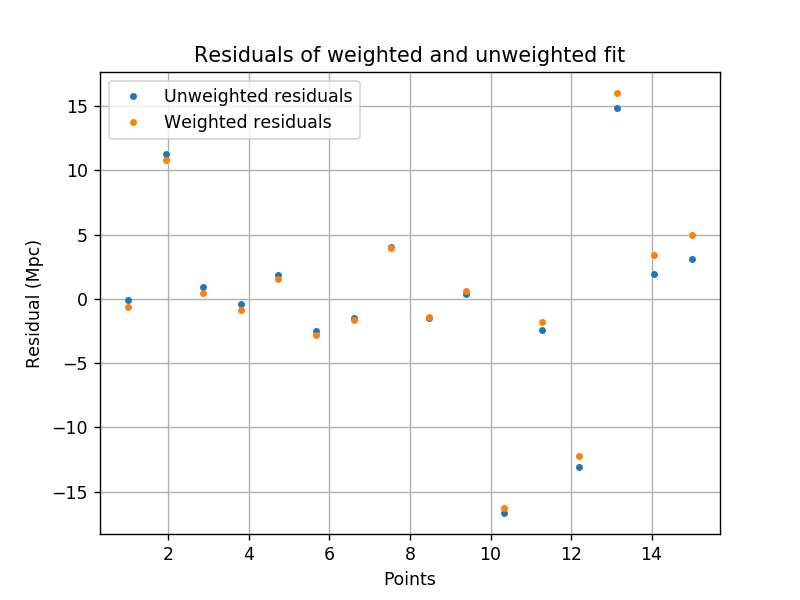

In [14]:
#Residual for unweighted line
d = distanceY - slope1 * velocityX - intercept1
#Residual for weighted line
weighted_d = distanceY - weighted_slope1 * velocityX - weighted_intercept1

# Plotting the residuals
plt.figure()
plt.title("Residuals of weighted and unweighted fit")
plt.grid(True)
plt.xlabel('Points')
plt.ylabel("Residual (Mpc)")
num = np.linspace(1,15,16)
plt.plot(num,d,".",label="Unweighted residuals")
plt.plot(num,weighted_d,".",label="Weighted residuals")
plt.legend(loc="best")


The residuals from the weighted and unweighted fit are fairly similar.<br> The straight line fit is appropriate to the data
based on the graph because the points are randomly distributed around zero and do not show any non-random patterns

## Question 5 - Calculating the Hubble constant
$$ v = H_0 D $$ 
from that:
$$ D =  \frac {1} {H_0}  v$$
which means that the Hubble constant is:<br> $$\frac {1} {slope}$$<br>
The propagated error in this case is:<br> $$\frac {1} {slope^2} \times uncertainty$$ 

In [15]:
hubble = 1/0.0156
weighted_hubble = 1/0.0155
unc_hubble = 1/(0.0156**2) * 0.0002
unc_weighted_hubble = 1/(0.0155**2) * 0.0009
print("Hubble constant from the unweighted fit: ({0:0.1f} \xb1 {1:0.1f}) Km/s/Mpc".format(hubble, unc_hubble))
print("Hubble constant from the weighted fit: ({0:0.0f} \xb1 {1:0.0f}) Km/s/Mpc".format(weighted_hubble,unc_weighted_hubble))

Hubble constant from the unweighted fit: (64.1 ± 0.8) Km/s/Mpc
Hubble constant from the weighted fit: (65 ± 4) Km/s/Mpc


Based on the results the unweighted fit is more appopriate because of the smaller uncertainty.

## Question 6 - Significance of the results

If the data is correct our results predict the Hubble constant with high accuracy. This could lead to an end of the confusion about the constant's value.

### References
Dr Louis Dash: PHAS0007 Reading Week Task 2019: Using least-squares ﬁtting to calculate the Hubble constant<br>
Data Analysis and Statistics Booklet Practical Physics and Computing 1: PHAS0007(former PHAS1240)
I Llorente-Garcia, P Jones and N Skipper
